**1. Introdução ao Objetivo**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2. Geração de Dados

In [ ]:
# Gerar expressões
np.random.seed(42)

def gerar_operacoes(n=1000):
    operacoes = []
    resultados = []
    simbolos = ['+', '-', '*', '/']

    for _ in range(n):
        x1 = np.round(np.random.uniform(0, 100), 2)
        x2 = np.round(np.random.uniform(0.1, 100), 2)  # evitar divisão por zero
        op = np.random.choice(simbolos)

        expr = f"{x1} {op} {x2}"
        try:
            resultado = eval(expr)
        except:
            resultado = np.nan

        operacoes.append((x1, x2, op))
        resultados.append(resultado)

    return pd.DataFrame(operacoes, columns=['x1', 'x2', 'op']), np.array(resultados)

3. Pré-processamento

In [ ]:
# Gerar os dados
X_raw, y_raw = gerar_operacoes(2000)

# Remover divisões por zero ou resultados inválidos
mask_validos = ~np.isnan(y_raw)
X_raw = X_raw[mask_validos]
y_raw = y_raw[mask_validos]

# Codificar operações
op_map = {'+': 0, '-': 1, '*': 2, '/': 3}
X_raw['op'] = X_raw['op'].map(op_map).astype(int)

# Convertendo para numpy array
X = X_raw.to_numpy().astype(float)
y = y_raw[mask_validos]

# Divisão treino/validação/teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test   = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

print("Conjuntos gerados:")
print(f"Treino:     {X_train.shape}")
print(f"Validação:  {X_val.shape}")
print(f"Teste:      {X_test.shape}")

Conjuntos gerados:
Treino:     (1200, 3)
Validação:  (400, 3)
Teste:      (400, 3)


In [ ]:
!pip install tensorflow


4. Instalação do TensorFlow/Keras Tuner

5. Construção do Modelo

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def build_model(activation='relu'):
    model = Sequential()

    model.add(Dense(64, input_shape=(3,), kernel_regularizer=l2(0.001)))

    if activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(tf.keras.layers.Activation(activation))

    model.add(Dropout(0.3))

    model.add(Dense(64, kernel_regularizer=l2(0.001)))

    if activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(tf.keras.layers.Activation(activation))

    model.add(Dropout(0.3))

    model.add(Dense(32, kernel_regularizer=l2(0.001)))

    if activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(tf.keras.layers.Activation(activation))

    model.add(Dense(1))  # Saída para regressão

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model


6. Treinamento do Modelo

In [ ]:
model_relu = build_model(activation='relu')
history_relu = model_relu.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=30,
    batch_size=32,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 2814608.7500 - mae: 682.8174 - val_loss: 1907685.6250 - val_mae: 525.2111
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3331498.7500 - mae: 761.6918 - val_loss: 1896560.6250 - val_mae: 522.9587
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3076694.0000 - mae: 708.3229 - val_loss: 1839167.6250 - val_mae: 528.0754
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2428532.7500 - mae: 641.5324 - val_loss: 1682272.5000 - val_mae: 590.4741
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2363516.2500 - mae: 735.0459 - val_loss: 1542209.0000 - val_mae: 716.1616
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2300370.2500 - mae: 903.4653 - val_loss: 1514060.0000 - val_mae: 805.1124
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1703754.1250 - mae: 849.0297 - val_loss: 1509567.6250 - val_mae: 820.3674
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1942569.500

7. Treinamento e Comparação

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def build_model(activation='relu'):
    model = Sequential()

    model.add(Dense(64, input_shape=(3,), kernel_regularizer=l2(0.001)))

    if activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(tf.keras.layers.Activation(activation))

    model.add(Dropout(0.3))

    model.add(Dense(64, kernel_regularizer=l2(0.001)))

    if activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(tf.keras.layers.Activation(activation))

    model.add(Dropout(0.3))

    model.add(Dense(32, kernel_regularizer=l2(0.001)))

    if activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(tf.keras.layers.Activation(activation))

    model.add(Dense(1))  # Saída para regressão

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model


In [ ]:
history_dict = {}

for act in ['relu', 'tanh', 'leaky_relu']:
    print(f"Treinando com ativação: {act}")
    model = build_model(activation=act)
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_val_scaled, y_val),
        epochs=30,
        batch_size=32,
        verbose=0  # silencioso
    )
    history_dict[act] = history


Treinando com ativação: relu
Treinando com ativação: tanh
Treinando com ativação: leaky_relu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


8.Análise dos Resultados

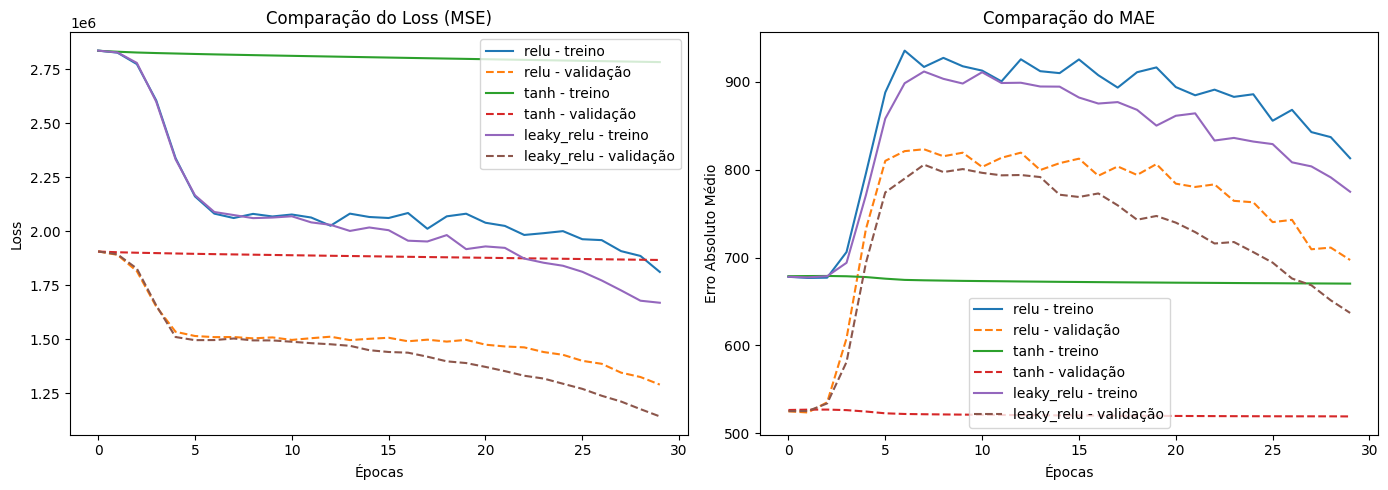

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Plot do Loss
plt.subplot(1, 2, 1)
for act, hist in history_dict.items():
    plt.plot(hist.history['loss'], label=f'{act} - treino')
    plt.plot(hist.history['val_loss'], linestyle='--', label=f'{act} - validação')
plt.title('Comparação do Loss (MSE)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Plot do MAE
plt.subplot(1, 2, 2)
for act, hist in history_dict.items():
    plt.plot(hist.history['mae'], label=f'{act} - treino')
    plt.plot(hist.history['val_mae'], linestyle='--', label=f'{act} - validação')
plt.title('Comparação do MAE')
plt.xlabel('Épocas')
plt.ylabel('Erro Absoluto Médio')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
!pip install -q keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


9. Definição do Espaço de Hiperparâmetros

In [ ]:
import keras_tuner as kt

def build_model_hp(hp):
    model = tf.keras.Sequential()

    # Hiperparâmetros variáveis
    neurons_1 = hp.Int('neurons_1', min_value=32, max_value=128, step=32)
    neurons_2 = hp.Int('neurons_2', min_value=32, max_value=128, step=32)
    neurons_3 = hp.Int('neurons_3', min_value=16, max_value=64, step=16)
    activation = hp.Choice('activation', ['relu', 'tanh', 'leaky_relu'])
    learning_rate = hp.Choice('lr', [1e-2, 1e-3, 1e-4])
    dropout_rate = hp.Float('dropout', 0.2, 0.5, step=0.1)
    l2_reg = hp.Float('l2_reg', 1e-4, 1e-2, sampling='log')
    optimizer_name = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd', 'nadam'])

    model.add(Dense(neurons_1, input_shape=(3,), kernel_regularizer=l2(l2_reg)))
    model.add(LeakyReLU(alpha=0.1) if activation == 'leaky_relu' else tf.keras.layers.Activation(activation))
    model.add(Dropout(dropout_rate))

    model.add(Dense(neurons_2, kernel_regularizer=l2(l2_reg)))
    model.add(LeakyReLU(alpha=0.1) if activation == 'leaky_relu' else tf.keras.layers.Activation(activation))
    model.add(Dropout(dropout_rate))

    model.add(Dense(neurons_3, kernel_regularizer=l2(l2_reg)))
    model.add(LeakyReLU(alpha=0.1) if activation == 'leaky_relu' else tf.keras.layers.Activation(activation))

    model.add(Dense(1))  # Saída única

    # Escolher otimizador
    if optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate, momentum=0.9)
    elif optimizer_name == 'nadam':
        optimizer = tf.keras.optimizers.Nadam(learning_rate)

    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model


10.Execução da Busca de Hiperparâmetros

In [ ]:
tuner = kt.RandomSearch(
    build_model_hp,
    objective='val_mae',
    max_trials=10,
    executions_per_trial=1,
    directory='my_tuner_dir',
    project_name='math_tuner'
)

tuner.search_space_summary()

tuner.search(
    X_train_scaled, y_train,
    epochs=30,
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    verbose=1
)


Trial 3 Complete [00h 00m 11s]
val_mae: nan

Best val_mae So Far: 519.4580688476562
Total elapsed time: 00h 00m 45s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
64                |96                |neurons_1
128               |128               |neurons_2
16                |32                |neurons_3
relu              |tanh              |activation
0.01              |0.001             |lr
0.3               |0.2               |dropout
0.0077094         |0.0068054         |l2_reg
adam              |nadam             |optimizer

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3115477.7500 - mae: 719.1756 - val_loss: 1545437.2500 - val_mae: 812.9026
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1874774.8750 - mae: 901.3250 - val_loss: 1519500.3750 - val_mae: 826.8586
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2043264.8750 - mae: 891.5602 - val_loss: 1534381.6250 - val_mae: 829.3635
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━


KeyboardInterrupt



11.Análise dos Melhores Hiperparâmetros

In [ ]:
# Exibir melhores combinações
tuner.results_summary()

# Recuperar melhor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# Avaliar no conjunto de teste
test_loss, test_mae = best_model.evaluate(X_test_scaled, y_test)
print(f'\nDesempenho no Teste - Loss: {test_loss:.4f} | MAE: {test_mae:.4f}')


Results summary
Results in my_tuner_dir/math_tuner
Showing 10 best trials
Objective(name="val_mae", direction="min")

Trial 00 summary
Hyperparameters:
neurons_1: 96
neurons_2: 128
neurons_3: 32
activation: tanh
lr: 0.001
dropout: 0.2
l2_reg: 0.006805387698117665
optimizer: nadam
Score: 519.4580688476562

Trial 01 summary
Hyperparameters:
neurons_1: 96
neurons_2: 32
neurons_3: 64
activation: leaky_relu
lr: 0.0001
dropout: 0.4
l2_reg: 0.0013301017233266828
optimizer: nadam
Score: 525.2591552734375

Trial 02 summary
Hyperparameters:
neurons_1: 128
neurons_2: 96
neurons_3: 48
activation: leaky_relu
lr: 0.01
dropout: 0.2
l2_reg: 0.00618012909224231
optimizer: sgd
Score: nan

Trial 03 summary
Hyperparameters:
neurons_1: 64
neurons_2: 128
neurons_3: 16
activation: relu
lr: 0.01
dropout: 0.30000000000000004
l2_reg: 0.007709359697494747
optimizer: adam


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 19 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2290219.0000 - mae: 657.1937    

Desempenho no Teste - Loss: 2194065.5000 | MAE: 590.0538


In [ ]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, Callback
import datetime


In [ ]:
class MAELogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        mae = logs.get('mae')
        val_mae = logs.get('val_mae')
        print(f"Época {epoch+1}: MAE = {mae:.4f}, Val_MAE = {val_mae:.4f}")


In [ ]:
# Criar pasta para TensorBoard
log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Definir callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True),
    TensorBoard(log_dir=log_dir, histogram_freq=1),
    MAELogger()
]


12.treinar melhor modelo

In [ ]:
history_cb = best_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=0  # MAELogger cuida da saída
)


Época 1: MAE = 670.5704, Val_MAE = 519.4489


Época 2: MAE = 670.3023, Val_MAE = 519.3141


Época 3: MAE = 670.1891, Val_MAE = 519.3456


Época 4: MAE = 669.8751, Val_MAE = 519.1484


Época 5: MAE = 669.4587, Val_MAE = 519.1560


Época 6: MAE = 669.3922, Val_MAE = 519.1797


Época 7: MAE = 669.4822, Val_MAE = 519.1928


Época 8: MAE = 669.4501, Val_MAE = 519.3476


Época 9: MAE = 669.0110, Val_MAE = 519.1909


Época 10: MAE = 669.2307, Val_MAE = 519.1257


Época 11: MAE = 668.1445, Val_MAE = 515.7909


Época 12: MAE = 660.0428, Val_MAE = 507.1765


Época 13: MAE = 657.7980, Val_MAE = 506.7524


Época 14: MAE = 657.2143, Val_MAE = 506.1152


Época 15: MAE = 656.8896, Val_MAE = 505.6423


Época 16: MAE = 656.2894, Val_MAE = 505.7546


Época 17: MAE = 656.1089, Val_MAE = 505.1035


Época 18: MAE = 655.4737, Val_MAE = 504.6953


Época 19: MAE = 655.1902, Val_MAE = 504.5929


Época 20: MAE = 654.8171, Val_MAE = 504.3638


Época 21: MAE = 654.4860, Val_MAE = 503.8362


Época 22: MAE = 654.2881, Val_MAE = 502.9371


Época 23: MAE = 653.5234, Val_MAE = 502.1438


Época 24: MAE = 652.9499, Val_MAE = 501.2270


Época 25: MAE = 651.6703, Val_MAE = 499.8258


Época 26: MAE = 650.6062, Val_MAE = 498.2544


Época 27: MAE = 649.0830, Val_MAE = 497.3667


Época 28: MAE = 647.5125, Val_MAE = 494.1845


Época 29: MAE = 645.4313, Val_MAE = 492.4961


Época 30: MAE = 644.4753, Val_MAE = 492.1717


Época 31: MAE = 643.6429, Val_MAE = 491.7689


Época 32: MAE = 642.9941, Val_MAE = 490.7226


Época 33: MAE = 642.2454, Val_MAE = 490.3712


Época 34: MAE = 641.5535, Val_MAE = 489.6282


Época 35: MAE = 641.3074, Val_MAE = 489.1893


Época 36: MAE = 640.5902, Val_MAE = 488.6615


Época 37: MAE = 640.2423, Val_MAE = 488.0098


Época 38: MAE = 639.4343, Val_MAE = 487.2892


Época 39: MAE = 638.7058, Val_MAE = 486.3281


Época 40: MAE = 637.8314, Val_MAE = 486.0073


Época 41: MAE = 637.7809, Val_MAE = 485.5686


Época 42: MAE = 637.2100, Val_MAE = 485.2155


Época 43: MAE = 636.5986, Val_MAE = 484.6260


Época 44: MAE = 636.2906, Val_MAE = 484.1950


Época 45: MAE = 635.9723, Val_MAE = 483.8629


Época 46: MAE = 635.3805, Val_MAE = 483.3853


Época 47: MAE = 635.0419, Val_MAE = 483.3212


Época 48: MAE = 634.5319, Val_MAE = 482.6856


Época 49: MAE = 633.9968, Val_MAE = 482.0020


Época 50: MAE = 633.6412, Val_MAE = 481.4756


In [ ]:
test_loss, test_mae = best_model.evaluate(X_test_scaled, y_test)
print(f'\n📌 Desempenho no Teste — Loss: {test_loss:.4f} | MAE: {test_mae:.4f}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2217955.2500 - mae: 617.8387  

📌 Desempenho no Teste — Loss: 2129532.5000 | MAE: 551.0555


In [ ]:
import numpy as np

# Testes com novos dados
novos_dados = np.array([
    [8, -4, 1],    # 8 / -4
    [-6, 3, 0],    # -6 + 3
    [7, 0, 1],     # 7 / 0 → tratar
    [4.5, 2.2, 2], # 4.5 * 2.2
])

# Tratamento para evitar divisão por zero
for i, row in enumerate(novos_dados):
    if row[2] == 1 and row[1] == 0:  # operação de divisão por zero
        print(f'⚠️ Entrada {i} contém divisão por zero. Ajustando para 0.0001')
        novos_dados[i][1] = 0.0001

# Normalizar os dados
novos_dados_scaled = scaler.transform(novos_dados)

# Previsão
predicoes = best_model.predict(novos_dados_scaled)
print("\n🧮 Resultados em novos dados:")
for entrada, resultado in zip(novos_dados, predicoes):
    print(f"Entrada: {entrada} → Resultado previsto: {resultado[0]:.2f}")


⚠️ Entrada 2 contém divisão por zero. Ajustando para 0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

🧮 Resultados em novos dados:
Entrada: [ 8. -4.  1.] → Resultado previsto: 7.94
Entrada: [-6.  3.  0.] → Resultado previsto: 17.99
Entrada: [7.e+00 1.e-04 1.e+00] → Resultado previsto: 7.76
Entrada: [4.5 2.2 2. ] → Resultado previsto: 80.22


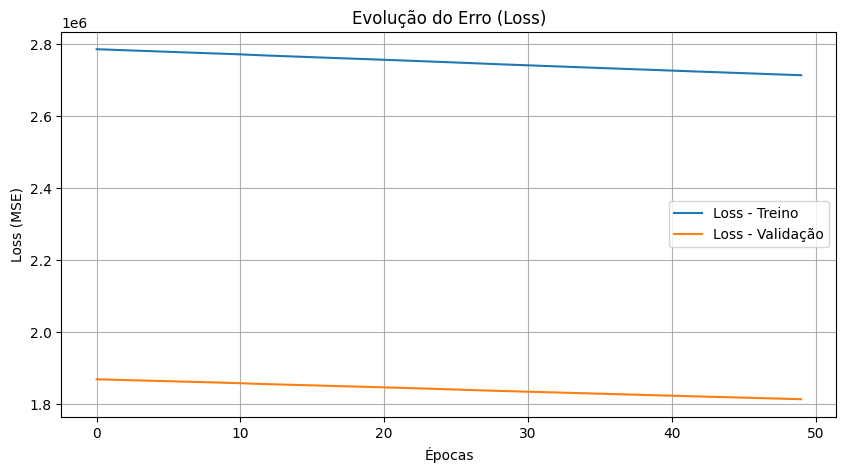

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history_cb.history['loss'], label='Loss - Treino')
plt.plot(history_cb.history['val_loss'], label='Loss - Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.title('Evolução do Erro (Loss)')
plt.legend()
plt.grid(True)
plt.show()
